In [2]:
from settings import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
import warnings
warnings.filterwarnings('ignore')

## Getting Started

In [3]:
#Settings
%matplotlib inline
pd.set_option('display.max_columns', 97)

def read_features():
    
    raw_data = pd.read_csv("2016-SFO-Customer-Survey-Data.csv")
    
    data = raw_data.drop(DROP_COLS, axis = 1)
    return data

In [4]:
data = read_features()
data.shape

(3087, 56)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3087 entries, 0 to 3086
Data columns (total 56 columns):
BAREA              3087 non-null object
AIRLINE            3087 non-null object
DESTINATION        3087 non-null object
DESTMARK           3087 non-null int64
HOWLONG            3087 non-null object
Q2PURP1            3087 non-null int64
Q2PURP2            173 non-null float64
Q2PURP3            12 non-null float64
Q4BAGS             3087 non-null int64
Q4STORE            3087 non-null int64
Q4FOOD             3087 non-null int64
Q4WIFI             3087 non-null int64
Q5TIMESFLOWN       3087 non-null int64
Q5FIRSTTIME        3087 non-null int64
Q6LONGUSE          3087 non-null int64
Q7ART              3087 non-null int64
Q7FOOD             3087 non-null int64
Q7STORE            3087 non-null int64
Q7SIGN             3087 non-null int64
Q7WALKWAYS         3087 non-null int64
Q7SCREENS          3087 non-null int64
Q7INFODOWN         3087 non-null int64
Q7INFOUP           3087 non-nu

In [6]:
data.describe()

,DESTMARK,Q2PURP1,Q2PURP2,Q2PURP3,Q4BAGS,Q4STORE,Q4FOOD,Q4WIFI,Q5TIMESFLOWN,Q5FIRSTTIME,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAYS,Q7SCREENS,Q7INFODOWN,Q7INFOUP,Q7WIFI,Q7ROADS,Q7PARK,Q7AIRTRAIN,Q7LTPARKING,Q7RENTAL,Q7ALL,Q9BOARDING,Q9AIRTRAIN,Q9RENTAL,Q9FOOD,Q9RESTROOM,Q9ALL,Q10SAFE,Q11TSAPRE,Q13 COUNTY,Q13GETRATE,Q14FIND,Q14PASSTHRU,Q15PROBLEM,Q16LIVE,Q17ZIP,Q18PET,Q21INCME,Q22FLY,Q23SJC,Q23OAK
count,3087.000000,3087.000000,173.000000,12.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,3087.000000,2065.000000,3087.000000,3087.000000,3087.000000,3086.000000,3086.000000
mean,3.153871,2.253644,3.393064,3.666667,1.366699,1.375769,1.308714,1.303531,2.184969,1.198899,2.535147,4.157110,3.819242,3.843213,4.003239,4.143829,4.086816,4.644963,4.620343,4.327502,4.389699,4.815031,4.761905,5.018788,4.839002,3.886297,4.338840,4.842890,4.910917,4.323291,4.057337,4.141885,4.271137,1.774214,6.528993,3.730483,4.216715,4.074830,1.804665,2.210560,78227.945278,1.148688,2.176547,2.030774,1.964031,1.966948
std,1.075550,1.441042,1.561290,1.154701,0.618597,0.684546,0.650738,0.641660,1.294009,0.432732,1.284780,1.278315,1.285436,1.305569,1.057328,1.079494,1.062337,1.477513,1.503834,1.454639,1.519605,1.648403,1.572199,1.723885,1.728960,1.098383,0.924144,1.439738,1.556508,1.345567,1.153603,0.991515,0.999685,0.945986,8.101094,1.684222,1.239867,1.465494,0.523341,1.010498,28644.753642,0.734033,1.399563,0.635950,0.717236,0.768216
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1401.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,1.000000,5.000000,3.000000,4.000000,3.000000,2.000000,1.000000,78665.000000,1.000000,1.000000,2.000000,2.000000,2.000000
50%,4.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,6.000000,6.000000,4.000000,5.000000,5.000000,6.000000,5.000000,4.000000,4.000000,5.000000,2.000000,5.000000,4.000000,5.000000,4.000000,2.000000,3.000000,94061.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,2.000000,7.000000,5.000000,5.000000,5.000000,2.000000,3.000000,94587.000000,1.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,13.000000,13.000000,6.000000,3.000000,3.000000,3.000000,3.000000,6.000000,2.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,4.000000,99.000000,6.000000,6.000000,6.000000,3.000000,3.000000,99901.000000,5.000000,5.000000,4.000000,4.000000,4.000000


## Data Cleaning

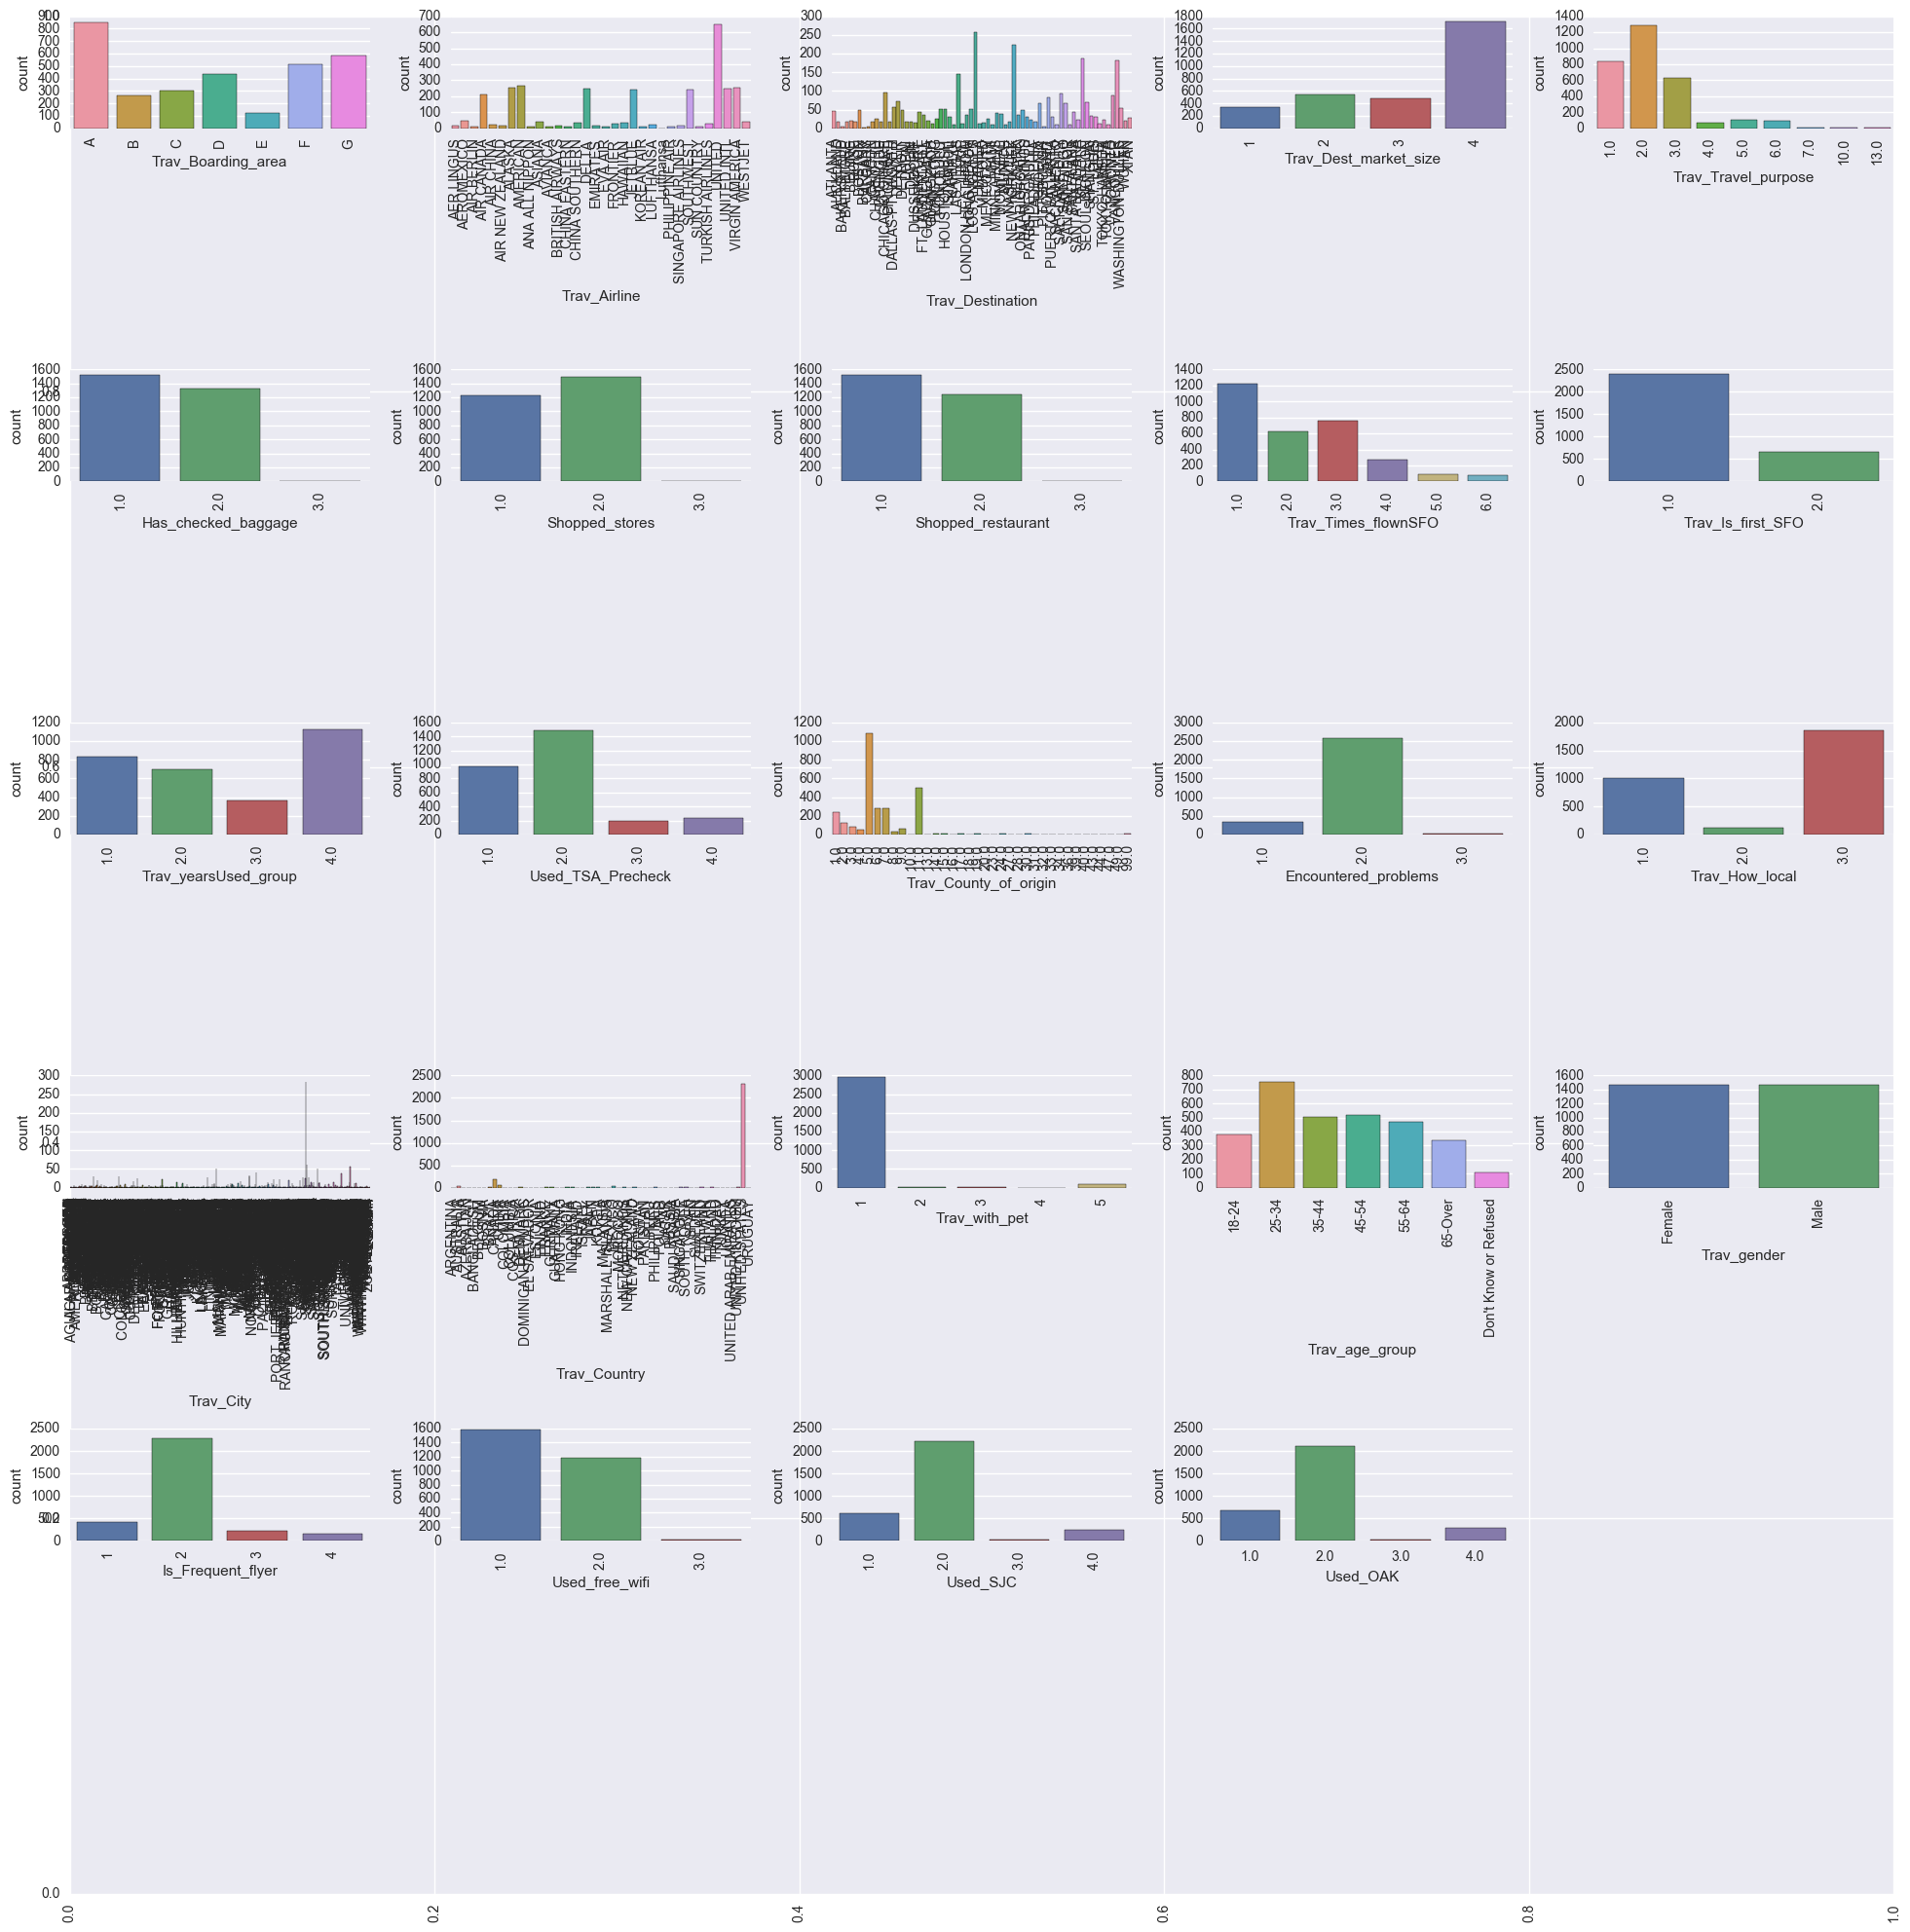

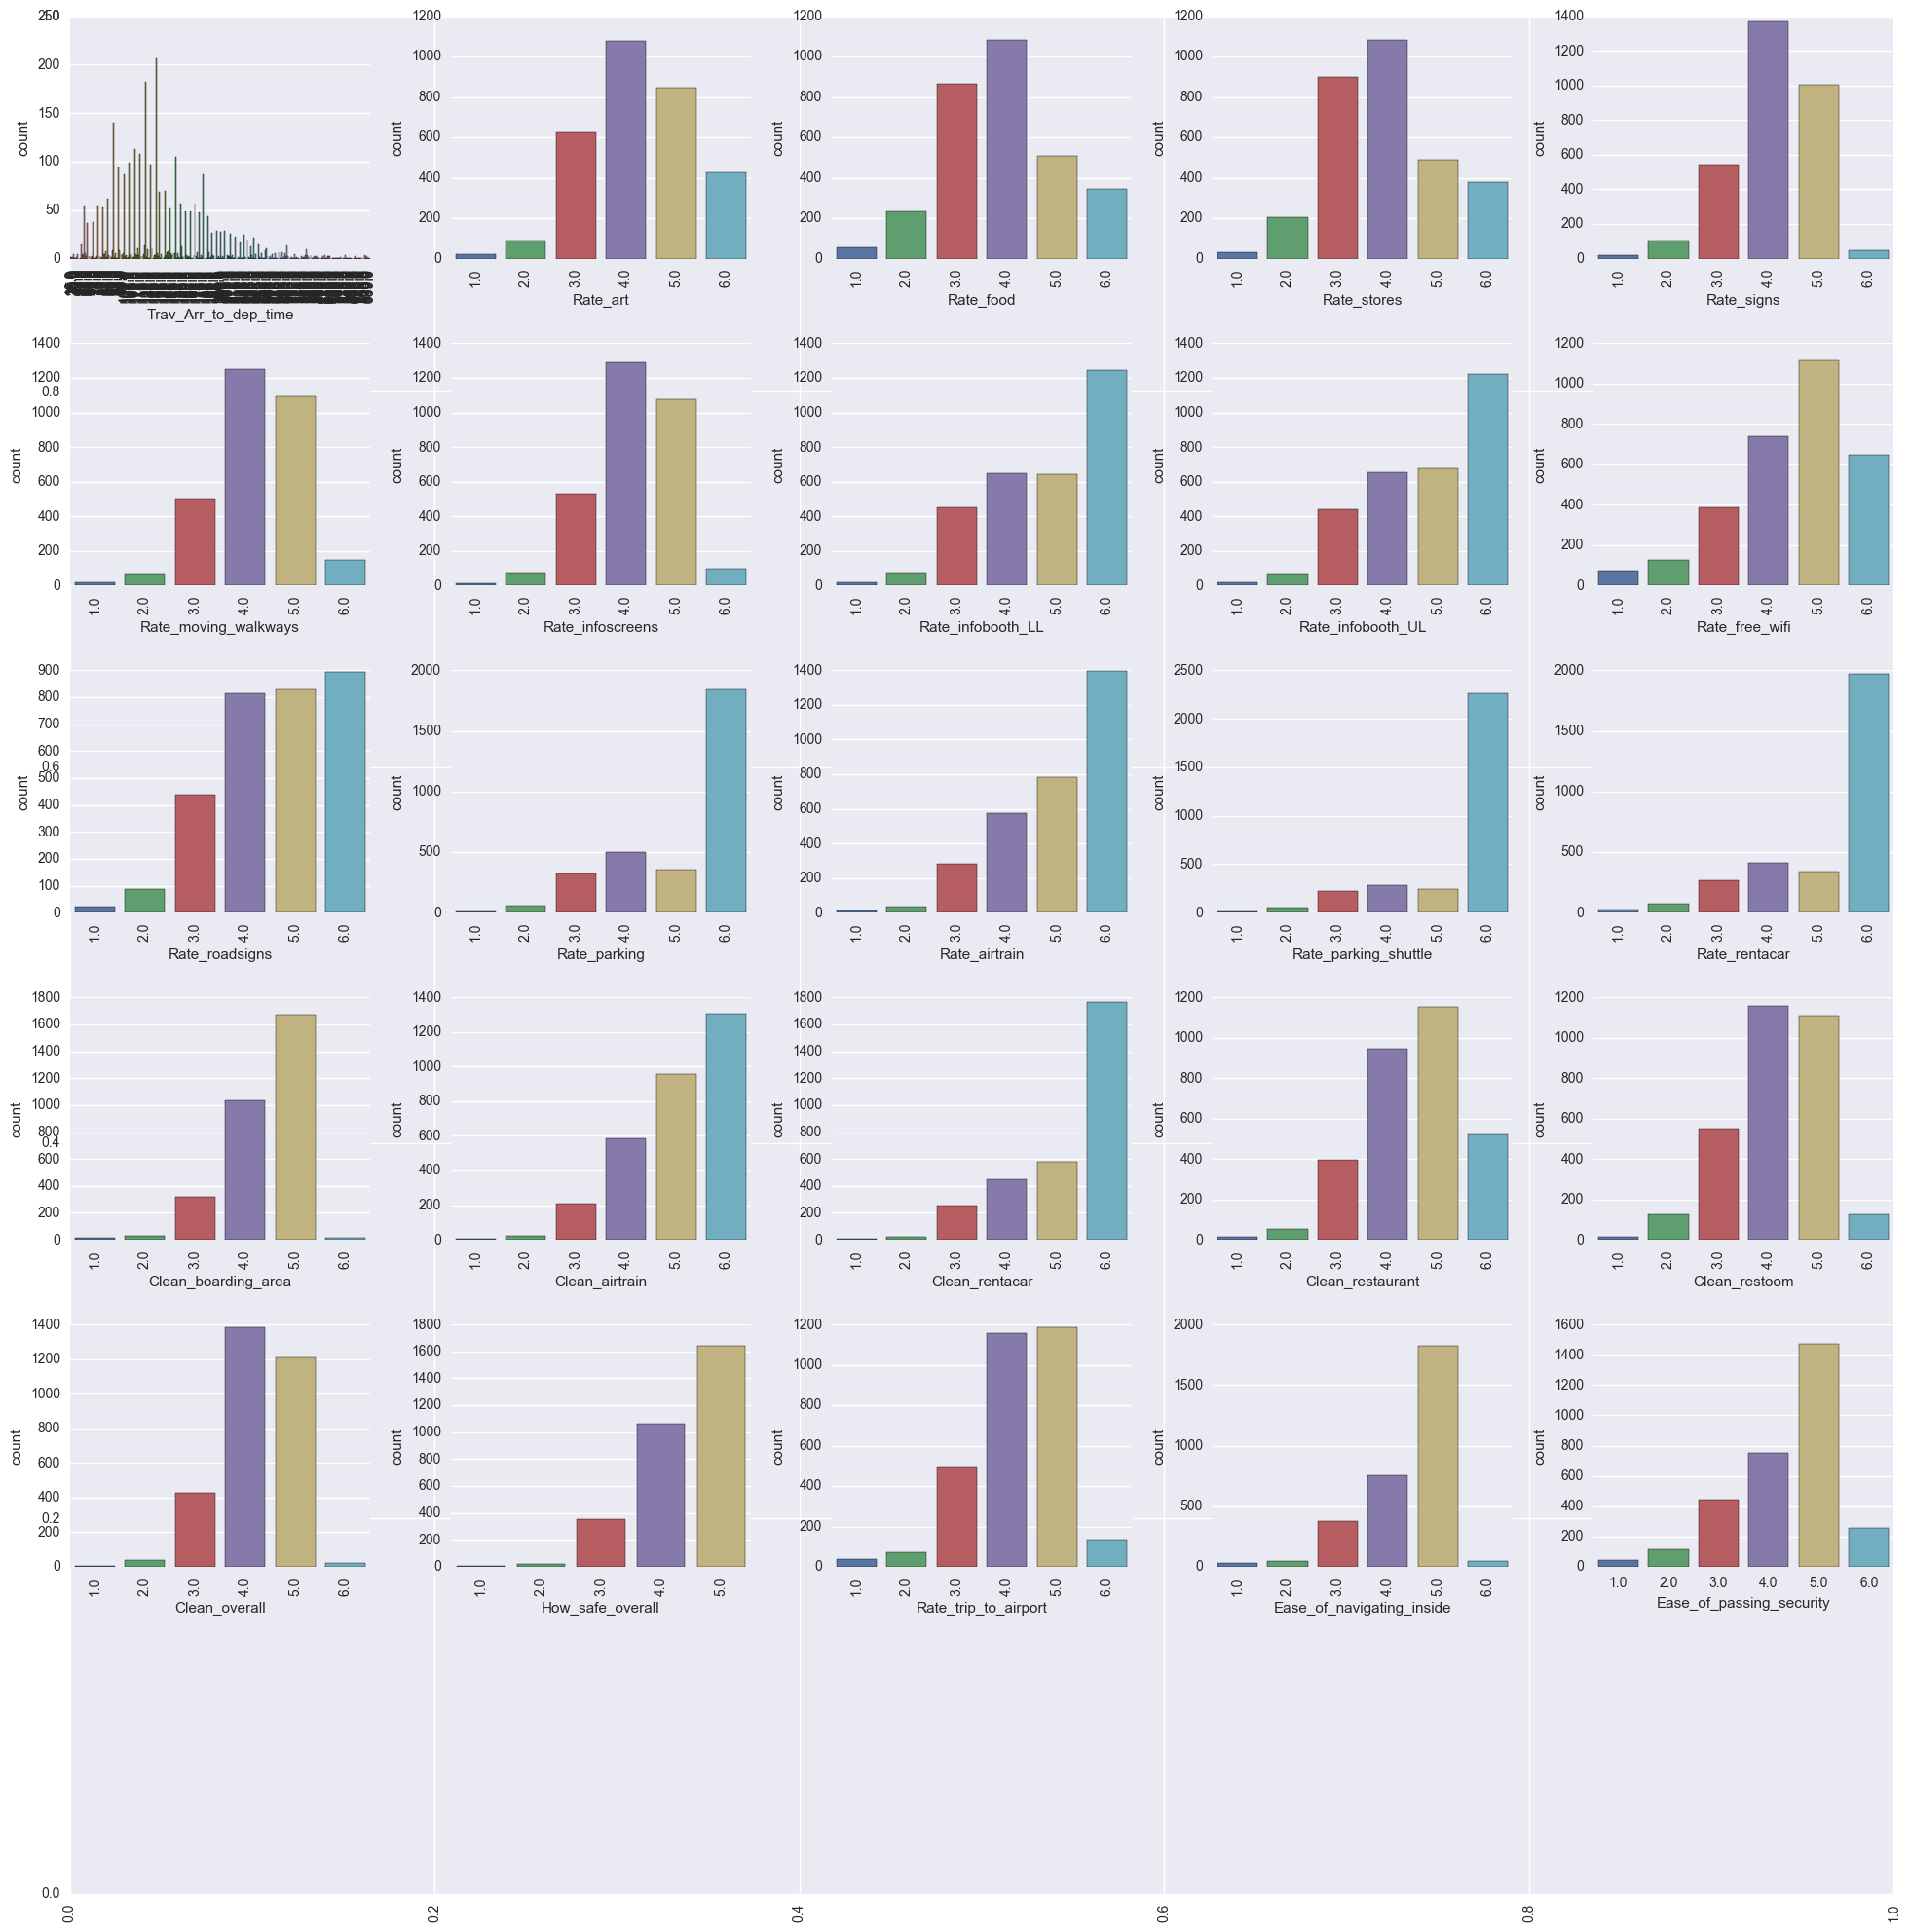

In [7]:
def prep_missing(data):
    
    # Survey codes blank/multiple responses as zeros. Replace all 0s and "0"s with NaN. 
    data = data.replace(0, np.nan)
    data = data.replace("0", np.nan)
    
    # Calculate threshold based on percentage of columns
    threshold = len(data.index) * PERCENT_MISSING
    
    # Find columns with missing data above a certain threshold
    high_missing = data.columns[data.isnull().sum() > threshold].tolist()
    
    # Keep only columns with low missing percentage from data
    imputables = data.drop(high_missing, axis=1)
    
    # Rename column names to human-readable text
    imputables_renamed = imputables.rename(columns=COLUMN_NAMES)
    return imputables_renamed

def encode_categories(data):
    
    label_encoder = LabelEncoder()
    encoded_categories = data.apply(label_encoder.fit_transform)
    return encoded_categories


#TODO: make cases uniform (to upper)


def get_categoricals(categorical_data):
    
    categorical_columns = CAT_COLS
    
    categorical_features = categorical_data[categorical_columns]
         
    #Convert to categories dtype   
    for col in categorical_columns:
        categorical_features[col] = categorical_features[col].astype('category')
        
    #Remove erroneous responses
    categorical_features['Trav_age_group'] = categorical_features['Trav_age_group'].cat.remove_categories(['Under 18','Under 19', 'Under 20', 'Under 21', 'Under 22','Under 23', 'Under 24', 'Under 25', 'Under 26', 'Under 27', 'Under 28', 'Under 29', 'Under 30', 'Under 31', 'Under 32']) 
    
    categorical_data['Trav_age_group'] = categorical_data['Trav_age_group'].replace("Don't Know or Refused", "NaN")
    
    
    
    encoded_cats = pd.get_dummies(categorical_features)
    return categorical_features, encoded_cats

def get_numerics(numeric_data, cols_to_remove):
    
    numeric_data['Trav_Arr_to_dep_time'] = numeric_data['Trav_Arr_to_dep_time'].replace("N", "NaN")
    numeric_features = numeric_data.drop(cols_to_remove, axis=1)
    return numeric_features

def get_xy_vars(data, col_name):
    
    y = data[col_name]
    x = data.drop(col_name, axis=1)
    return y, x

def imputer(data, strategy):
    
    imp = Imputer(missing_values='NaN', strategy=strategy, axis=0)
    x_clean = imp.fit_transform(data)
    x_all = pd.DataFrame(x_clean, columns = data.columns) #Put column names back on
    return x_all

def barplot(data):
    
    chrt = 0
    fig = plt.figure(figsize=(20, 20))
    for col in data.columns:
        chrt+=1
        num_figs = len(data.columns)/4
        plt.xticks(rotation=90)
        plt.tight_layout()
        ax = fig.add_subplot(num_figs,5,chrt)
        sns.countplot(x=col, data=data)
    fig.show()


if __name__ == "__main__":
    
    data=read_features()
    
    prepped = prep_missing(data)
    
    cat_cols, dummy_cats = get_categoricals(prepped)
    nums = get_numerics(prepped, cat_cols)
    
    y_all, x_nums = get_xy_vars(nums, 'Rate_SFO_overall')
    
    imputed_nums = imputer(x_nums, 'median')
    
    x_all = pd.concat([imputed_nums,dummy_cats], axis=1)
    
    #TODO : Fix scale or truncate charts with many bins
    barplot(cat_cols)
    barplot(imputed_nums)

## Data exploration 

#### Top 20 destinations for travelers flying out of SFO
- Surprisingly, the most popular destination is Los Angeles, only a 90 minute flight from SFO. Being a big train enthusiast, I'd hoped many people would choose Amtrak for intrastate travel. On further research, a train ride from San Jose to Los Angeles takes a whopping 11 hours! It's a beautiful ride down the coast, but compared to flight time, its probably a tough sell to all but the most leisurely traveler. 

In [8]:
topdests = cat_cols["Trav_Destination"].value_counts().nlargest(20)
toplists = topdests.index.tolist()
print topdests

LOS ANGELES          256
NEW YORK-JFK         223
SEATTLE              187
VANCOUVER            183
LAS VEGAS            146
CHICAGO-O'HARE        96
SALT LAKE CITY        94
TORONTO               87
PORTLAND              83
DENVER                73
SEOUL-INCHEON         69
PHOENIX               68
SAN DIEGO             68
DALLAS-FT. WORTH      58
WASHINGTON-DULLES     54
HOUSTON-BUSH          51
LONG BEACH            51
HONOLULU              51
BOSTON                50
ONTARIO (CALIF)       49
Name: Trav_Destination, dtype: int64


#### Which airlines travel to these top destinations? 
- For airlines like Air Canada, Jetblue and Alaska, SFO ridership is densely concentrated on one or two cities, whereas airlines like United, Virgin and Southwest carry fewer passengers to a wider array of destinations.

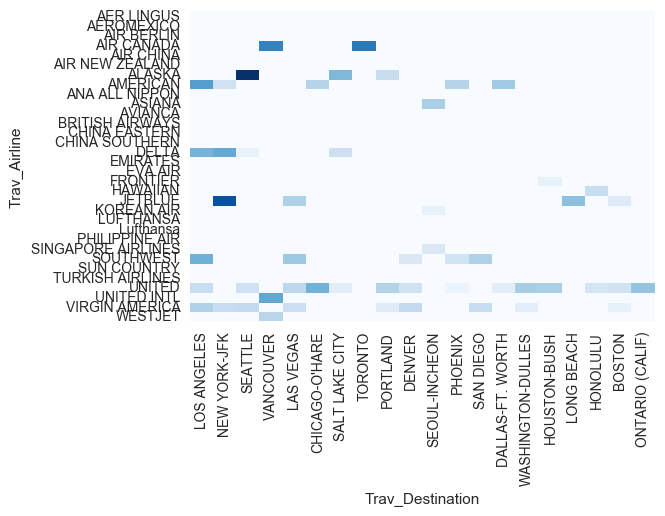

In [11]:
crosstab_airline = pd.crosstab(cat_cols["Trav_Airline"], cat_cols["Trav_Destination"])
crosstab_airline = crosstab_airline[toplists] 
s = sns.heatmap(crosstab_airline, cmap="Blues", cbar=False)

#### Most popular destinations by gender
- It appears that men are favoring LA, NY and Seattle, while women have the edge on Vancouver. 

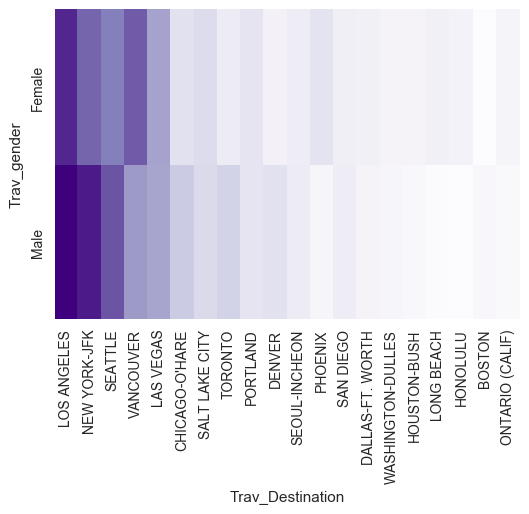

In [10]:
crosstab_gender = pd.crosstab(cat_cols["Trav_gender"], cat_cols["Trav_Destination"])
crosstab_gender = crosstab_gender[toplists] 
s = sns.heatmap(crosstab_gender, cmap="Purples", cbar=False)

#### Do travelers with certain destinations use wifi more often? 

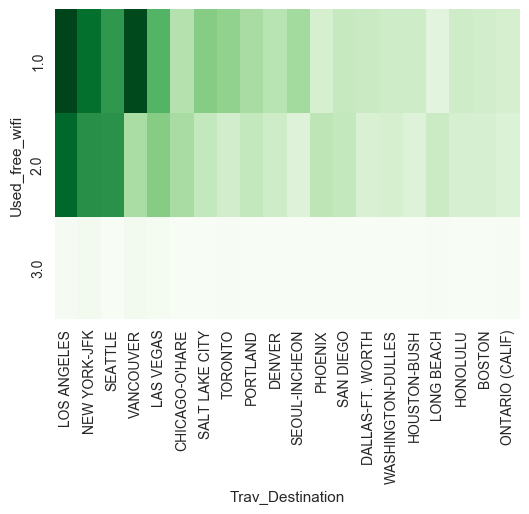

In [12]:
crosstab_wifi = pd.crosstab(cat_cols["Used_free_wifi"], cat_cols["Trav_Destination"])
crosstab_wifi = crosstab_wifi[toplists] 
s = sns.heatmap(crosstab_wifi, cmap="Greens", cbar=False)